In [2]:
from skimage import io as skio
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import platform
import tempfile
import os
import cv2
from haze_functions import dark_channel, atmosphere_light, transmission, get_atmosphere, haze_remove
# necessite scikit-image 

In [11]:
im = skio.imread("haze_image/15.png")

darkchannel = dark_channel(im,15)

image_gray = np.mean(im, axis=2).astype(np.uint8)

lol = atmosphere_light(im, darkchannel, 0.001)
print(lol)
t = transmission(im, lol, 0.95, 15)

[215 214 216]


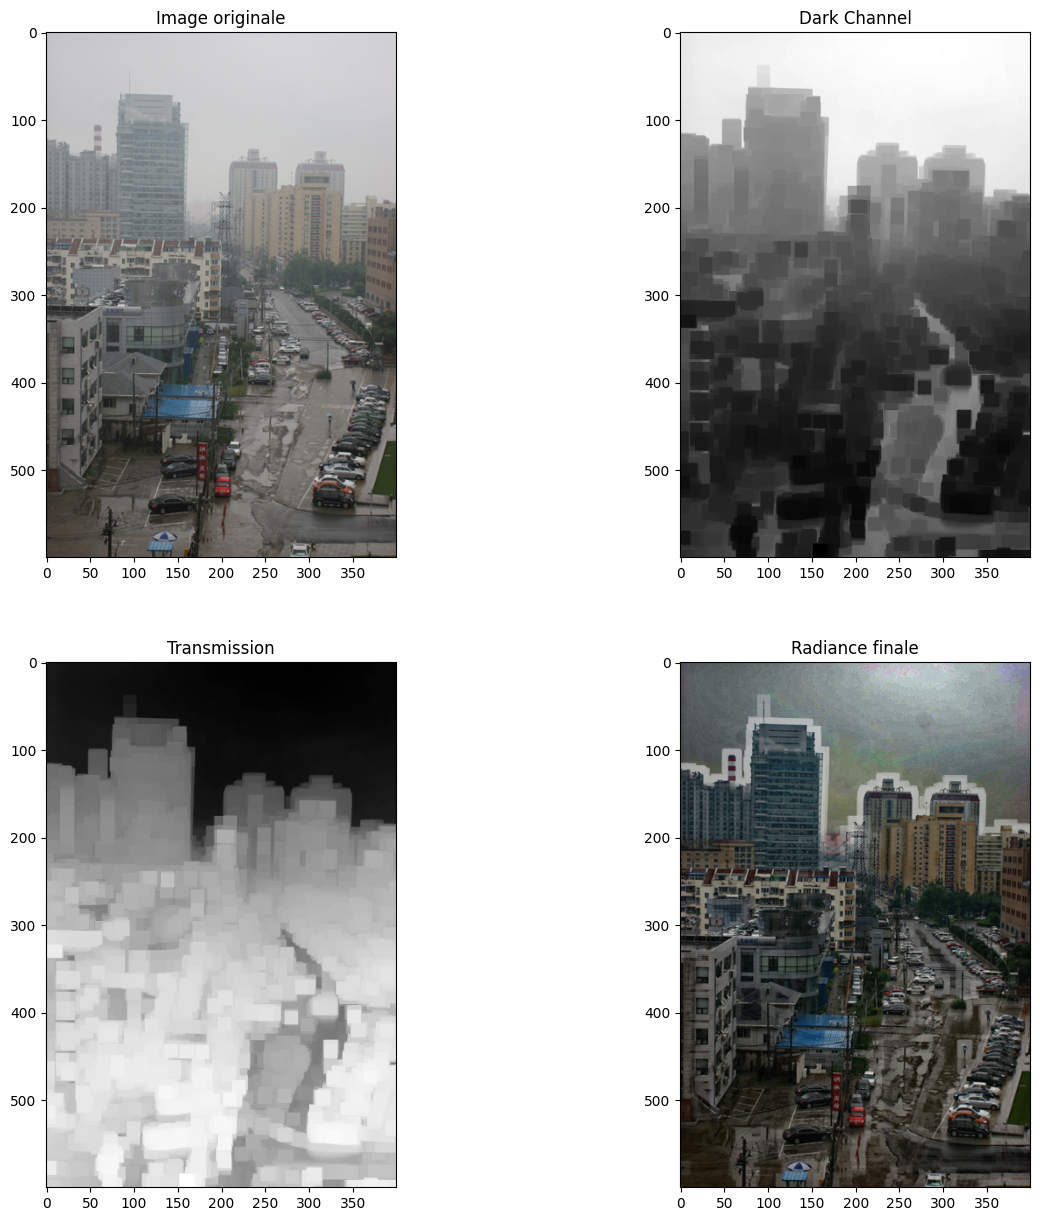

[[[0.3103491  0.27978812 0.31427067]
  [0.28370969 0.30642753 0.31427067]
  [0.25707028 0.33306694 0.26099185]
  ...
  [0.50454879 0.54899701 0.55684014]
  [0.55291857 0.59736679 0.60520992]
  [0.50454879 0.54899701 0.55684014]]

 [[0.31198809 0.28150906 0.36902457]
  [0.28543063 0.30806652 0.31590966]
  [0.25887317 0.30806652 0.31590966]
  ...
  [0.55291857 0.59736679 0.60520992]
  [0.55291857 0.59736679 0.60520992]
  [0.55291857 0.59736679 0.60520992]]

 [[0.31198809 0.28150906 0.36902457]
  [0.28543063 0.30806652 0.31590966]
  [0.28543063 0.30806652 0.31590966]
  ...
  [0.55291857 0.59736679 0.60520992]
  [0.55291857 0.59736679 0.60520992]
  [0.50454879 0.54899701 0.55684014]]

 ...

 [[0.14672578 0.11378706 0.06359591]
  [0.14672578 0.12829563 0.07326829]
  [0.15639816 0.12345944 0.07326829]
  ...
  [0.40248342 0.36365858 0.33223554]
  [0.40248342 0.36365858 0.33223554]
  [0.37630597 0.33748113 0.30605808]]

 [[0.15639816 0.12345944 0.08294067]
  [0.15639816 0.12829563 0.0684321 ]


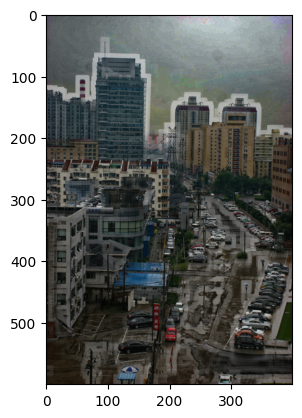

In [12]:
final = haze_remove(im,lol,t,0.1)
print(final)
plt.imshow(final)
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0][0].imshow(im )  # Utilisez 'gray' pour les images en niveaux de gris
axes[0][0].set_title('Image originale')

axes[0][1].imshow(darkchannel, cmap='gray')
axes[0][1].set_title('Dark Channel')

axes[1][0].imshow(t, cmap='gray')
axes[1][0].set_title('Transmission')

axes[1][1].imshow(final)
axes[1][1].set_title('Radiance finale')
plt.show()